In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
import os
from matplotlib import font_manager, rc
import matplotlib

warnings.filterwarnings('ignore')

# ========================================
#    (Windows ) -  
# ========================================
print("="*60)
print("    ...")
print("="*60)

# 1. seaborn    ( )
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

# 2.     (  !)
font_path = "C:/Windows/Fonts/malgun.ttf"

if os.path.exists(font_path):
    #   font_manager 
    try:
        font_manager.fontManager.addfont(font_path)
    except:
        pass  #     
    
    #  'Malgun Gothic'  
    font_name = 'Malgun Gothic'
    
    #  rcParams  
    matplotlib.rcParams['font.family'] = font_name
    matplotlib.rcParams['font.sans-serif'] = [font_name, 'rial', 'ejaVu Sans']
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name, 'rial', 'ejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    
    # rc 
    rc('font', family=font_name)
    
    # seaborn   
    sns.set(font=font_name)
    
    #  
    print(f"   : {font_path}")
    print(f"   : {font_name}")
    print(f"   → font.family: {plt.rcParams['font.family']}")
    print(f"   → font.sans-serif: {plt.rcParams['font.sans-serif'][:2]}")
    
else:
    #  
    print("     .")
    font_list = [f.name for f in font_manager.fontManager.ttflist]
    korean_fonts = ['Malgun Gothic', 'NanumGothic', 'Gulim', 'otum']
    
    for font in korean_fonts:
        if font in font_list:
            matplotlib.rcParams['font.family'] = font
            plt.rcParams['font.family'] = font
            plt.rcParams['font.sans-serif'] = [font]
            plt.rcParams['axes.unicode_minus'] = False
            sns.set(font=font)
            print(f"   : {font}")
            break

print("="*60)

#   
if not os.path.exists(''):
    os.makedirs('')
    print("    ")

print("   ")
print("="*60)


📝 한글 폰트 설정 중...
✅ 폰트 파일 로드: C:/Windows/Fonts/malgun.ttf
✅ 폰트 설정 완료: Malgun Gothic
   → font.family: ['Malgun Gothic']
   → font.sans-serif: ['Arial', 'DejaVu Sans']
✅ 라이브러리 임포트 완료


🧪 한글 폰트 테스트
✓ 현재 폰트: ['Malgun Gothic']
✓ sans-serif: ['Arial', 'DejaVu Sans']


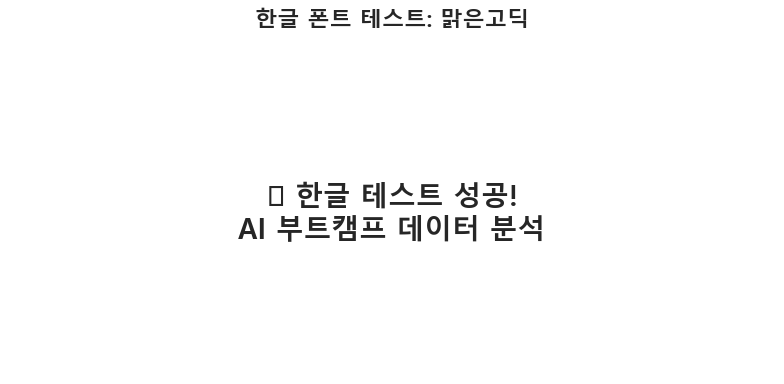


✅ 위 그래프에서 한글이 제대로 보이면 성공!
❌ 네모 박스(□)로 보이면 커널을 재시작하고 다시 시도하세요.


In [ ]:
# ========================================
#     ( )
# ========================================
#       

import matplotlib.pyplot as plt

print("="*60)
print("   ")
print("="*60)

#    
print(f"  : {plt.rcParams['font.family']}")
print(f" sans-serif: {plt.rcParams['font.sans-serif'][:2]}")
print("="*60)

#    
fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, '  !\nI   ', 
        fontsize=20, ha='center', va='center', weight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('  : ', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n      !")
print("  ()     .")

In [7]:
#  
inflearn = pd.read_csv('inflearnCrawling.csv')
bootcamp = pd.read_csv('bootcampCrawling.csv')
yozm = pd.read_csv('yozm_articles_20251214_205605.csv')

#    
print("=" * 80)
print("  ")
print("=" * 80)
print(f"1.  I : {len(inflearn):,}")
print(f"2. : {len(bootcamp):,}")
print(f"3. IT : {len(yozm):,}")
print(f"\n : {len(inflearn) + len(bootcamp) + len(yozm):,}")
print("=" * 80)

#  
print("\n[  ]")
print(inflearn.head(3))
print("\n[  ]")
print(bootcamp.head(3))
print("\n[IT  ]")
print(yozm.head(3))


【데이터 로드 완료】
1. 인프런 AI 강의: 535개
2. 부트캠프: 124개
3. 요즘IT 아티클: 600개

총 데이터: 1,259건

[인프런 데이터 샘플]
  category            category_slug  \
0    AI 기술  artificial-intelligence   
1    AI 기술  artificial-intelligence   
2    AI 기술  artificial-intelligence   

                                               title  
0  (UPDATED) Python을 이용한 개인화 추천시스템 | 추천알고리즘 | 추천인공지능  
1       (기획자를 위한) LLM 애플리케이션 사용자 요구 사항 수집과 분석 방법의 이해  
2                         (기획자를 위한) LLM 응용 서비스 사례 분석  

[부트캠프 데이터 샘플]
  organization                                              title category  \
0      마이크로소프트  Microsoft Academy (마이크로소프트 아카데미) Microsoft AI ...    AI/ML   
1   아시아경제 교육센터                           AI·데이터분석 기반 서비스 기획&개발 4기    데이터분석   
2         iM뱅크     iM DiGital Banker Academy 데이터 분석 전문가 양성과정 7-8기  데이터사이언스   

                                            keywords         source  
0  AI기본, Github, 파이썬, 클라우드, 데이터수집및전처리, 인공신경망및전이학습...  data_category  
1  Python, PowerBI, 통계, 데이터베이스, SQL, Pandas, Git,...  data_cate

In [8]:
# I   
I_KEYWORS = [
    'I', 'ai', '.I', '',
    'ChatGPT', 'GPT', 'LLM', 'llm',
    '', '', 'Machine Learning', 'eep Learning',
    'LangChain', 'Claude', 'Gemini', 'Copilot',
    '', 'Generative', '', 'NLP',
    'OpenI', 'nthropic', '',
    'Transformer', 'BERT', '', 'Fine-tuning',
    'Prompt', '', 'gent', ''
]

def contains_ai(text):
    """ I    """
    if pd.isna(text):
        return False
    text_str = str(text).lower()
    return any(keyword.lower() in text_str for keyword in I_KEYWORS)

print(" I   ")
print(f" {len(I_KEYWORS)}  ")


✅ AI 키워드 정의 완료
총 31개 키워드 사용


In [9]:
#  I   (, ,   )
bootcamp['is_ai'] = (
    bootcamp['title'].apply(contains_ai) | 
    bootcamp['keywords'].apply(contains_ai) | 
    bootcamp['category'].apply(contains_ai)
)

ai_bootcamp = bootcamp[bootcamp['is_ai'] == True]
ai_bootcamp_count = len(ai_bootcamp)
ai_bootcamp_ratio = (ai_bootcamp_count / len(bootcamp)) * 100

print("=" * 80)
print(" I  ")
print("=" * 80)
print(f" : {len(bootcamp)}")
print(f"I  : {ai_bootcamp_count}")
print(f"I : {ai_bootcamp_ratio:.1f}%")
print("=" * 80)

# I   5 
print("\n[I   5 ]")
print(ai_bootcamp['organization'].value_counts().head(5))


【부트캠프 AI 분석 결과】
전체 부트캠프: 124개
AI 관련 부트캠프: 96개
AI 비율: 77.4%

[AI 부트캠프 상위 5개 기관]
organization
모두의연구소       12
멀티캠퍼스         7
스파르타코딩클럽      5
패스트캠퍼스        5
하이미디어아카데미     4
Name: count, dtype: int64


In [10]:
# IT I   
yozm['is_ai'] = yozm['title'].apply(contains_ai)

ai_news = yozm[yozm['is_ai'] == True]
ai_news_count = len(ai_news)
ai_news_ratio = (ai_news_count / len(yozm)) * 100

print("=" * 80)
print("IT  I  ")
print("=" * 80)
print(f" : {len(yozm)}")
print(f"I  : {ai_news_count}")
print(f"I : {ai_news_ratio:.1f}%")
print("=" * 80)

# I   
print("\n[I     5]")
for idx, title in enumerate(ai_news['title'].head(5), 1):
    print(f"{idx}. {title[:60]}...")


【요즘IT 뉴스 AI 분석 결과】
전체 아티클: 600개
AI 관련 아티클: 266개
AI 비율: 44.3%

[AI 관련 뉴스 제목 샘플 5개]
1. 스타트업 출신 개발자로 네임드 기업에서 AI와 살아남기 11분 2일 전 2025년을 돌아보면, 그냥 ‘바빴다...
2. 개발자는 이제 일하는 방식부터 재정의해야 합니다 10분 4일 전 인기 불과 몇 년 전까지만 해도 개발자는 누...
3. 2025년 회고와 2026년 개발 트렌드 전망 7분 4일 전 2024년 회고를 정리한 것이 불과 얼마 전인 ...
4. 클로드 해커톤 1위 썰부터 카카오 Kanana 개발기까지: 핫한 AI 개발 밋업 Instruct.KR 8분 ...
5. 10년간의 PyCon 영상 데이터가 들려준 파이썬의 미래 17분 5일 전 2025년 파이콘 한국에서 전 세계...


In [11]:
#    
summary_data = pd.ataFrame({
    '': ['', '', 'IT'],
    ' ': [len(inflearn), len(bootcamp), len(yozm)],
    'I ': [len(inflearn), ai_bootcamp_count, ai_news_count],
    'I (%)': [100.0, ai_bootcamp_ratio, ai_news_ratio]
})

print("=" * 80)
print(" I  ")
print("=" * 80)
print(summary_data.to_string(index=False))
print("=" * 80)


【플랫폼별 AI 콘텐츠 비교】
 플랫폼  전체 콘텐츠  AI 관련   AI 비율(%)
 인프런     535    535 100.000000
부트캠프     124     96  77.419355
요즘IT     600    266  44.333333


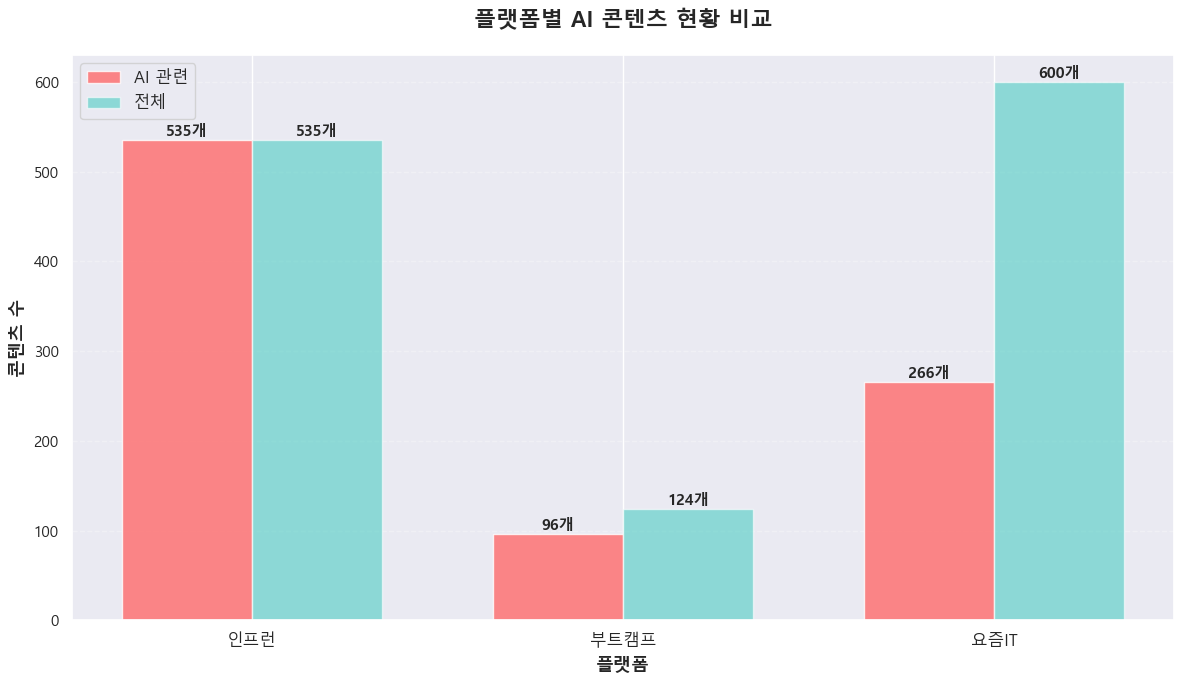

✅ 시각화 1 저장 완료: 분석결과/1_platform_comparison.png


In [12]:
#  I    
fig, ax = plt.subplots(figsize=(12, 7))

platforms = summary_data['']
x = range(len(platforms))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], summary_data['I '], 
               width, label='I ', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], summary_data[' '], 
               width, label='', color='#4ECC4', alpha=0.6)

#    
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('', fontsize=13, fontweight='bold')
ax.set_ylabel(' ', fontsize=13, fontweight='bold')
ax.set_title(' I   ', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(platforms, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('/1_platform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("  1  : /1_platform_comparison.png")


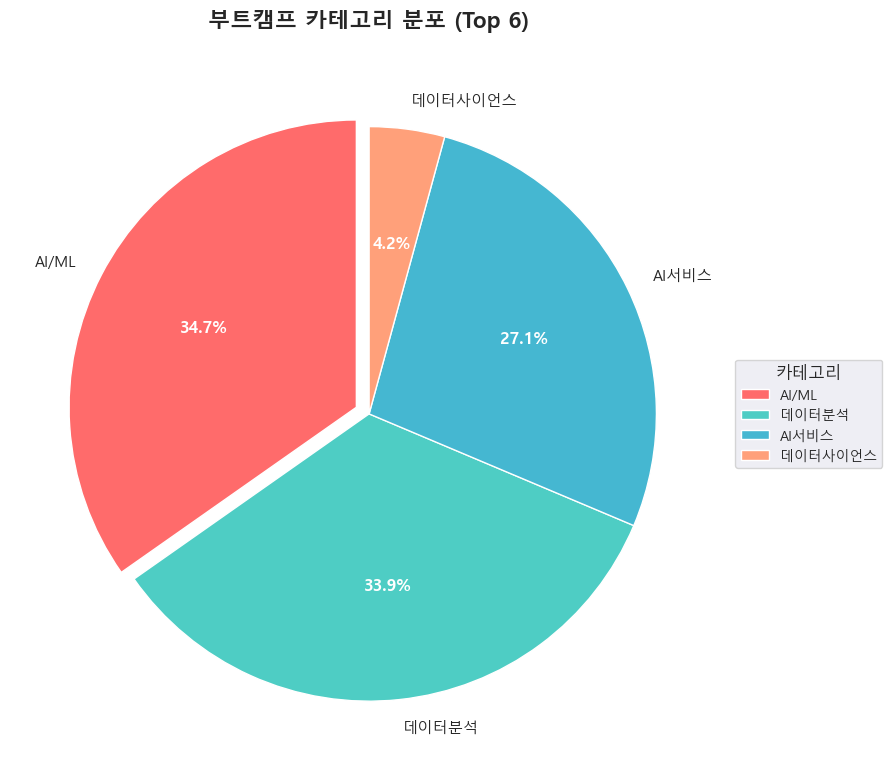

✅ 시각화 2 저장 완료: 분석결과/2_bootcamp_category_pie.png


In [13]:
#   
category_counts = bootcamp['category'].value_counts().head(6)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECC4', '#45B71', '#FF07', '#988C8', '#F7C6F']

wedges, texts, autotexts = ax.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11},
    explode=[0.05 if i == 0 else 0 for i in range(len(category_counts))]
)

#   
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax.set_title('   (Top 6)', 
             fontsize=16, fontweight='bold', pad=20)

#  
plt.legend(category_counts.index, 
          title="", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.tight_layout()
plt.savefig('/2_bootcamp_category_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("  2  : /2_bootcamp_category_pie.png")


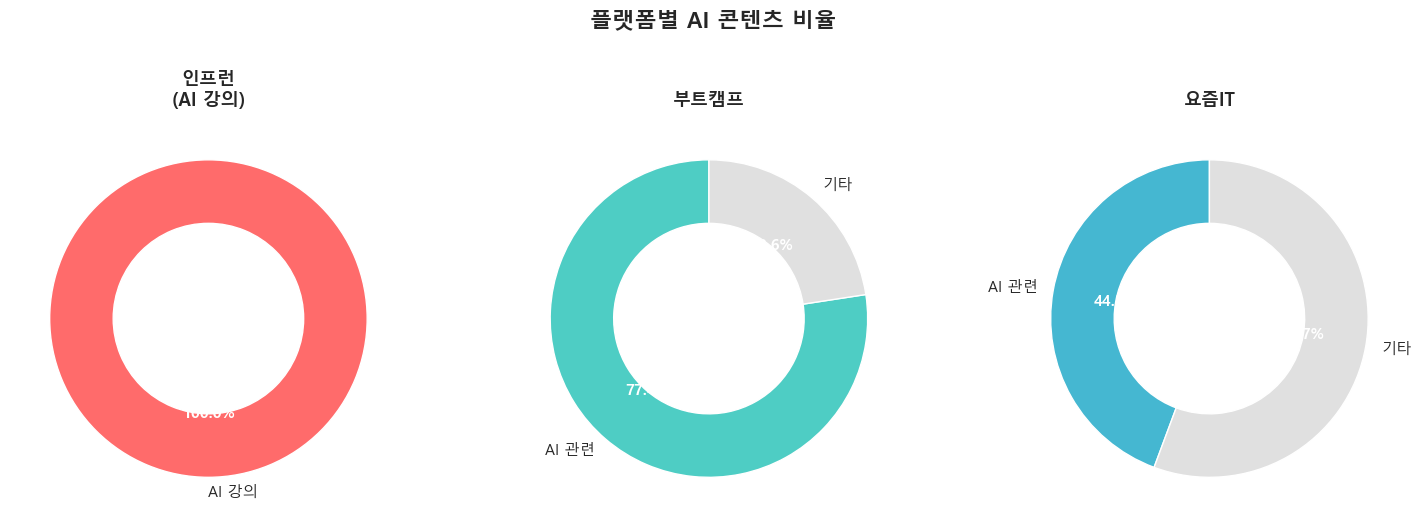

✅ 시각화 3 저장 완료: 분석결과/3_ai_ratio_comparison.png


In [14]:
# I    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#  
datasets = [
    ('\n(I )', [len(inflearn)], ['I '], ['#FF6B6B']),
    ('', [ai_bootcamp_count, len(bootcamp) - ai_bootcamp_count], 
     ['I ', ''], ['#4ECC4', '#E0E0E0']),
    ('IT', [ai_news_count, len(yozm) - ai_news_count], 
     ['I ', ''], ['#45B71', '#E0E0E0'])
]

for idx, dataset in enumerate(datasets):
    title = dataset[0]
    data = dataset[1]
    labels = dataset[2]
    colors = dataset[3]
    
    #  
    wedges, texts, autotexts = axes[idx].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.4)
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    axes[idx].set_title(title, fontsize=13, fontweight='bold', pad=10)

plt.suptitle(' I  ', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('/3_ai_ratio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("  3  : /3_ai_ratio_comparison.png")

In [15]:
#  I   
#    
all_keywords = []

for title in inflearn['title']:
    #     
    words = re.findall(r'[--Za-z]+', str(title))
    # 2   
    keywords = [word for word in words if len(word) >= 2]
    all_keywords.extend(keywords)

#   (  )
stopwords = ['', '', '', '', '', '', '', '', '', 
             '', '', '', '', '', '', '', '', 
             '', '', '', '', '', '', '', '', '']

filtered_keywords = [kw for kw in all_keywords if kw not in stopwords and len(kw) >= 2]

#  
keyword_counter = Counter(filtered_keywords)
top_keywords = keyword_counter.most_common(15)

print("==" * 40)
print(" I    Top 15")
print("==" * 40)
for idx, (keyword, count) in enumerate(top_keywords, 1):
    print(f"{idx:2d}. {keyword:15s} : {count:3d}")
print("==" * 40)

【인프런 AI 강의 주요 키워드 Top 15】
 1. AI              : 200회
 2. 딥러닝             :  63회
 3. ChatGPT         :  46회
 4. 배우는             :  43회
 5. 머신러닝            :  38회
 6. 실무              :  32회
 7. 활용한             :  31회
 8. LLM             :  29회
 9. 인공지능            :  27회
10. Part            :  22회
11. 데이터             :  22회
12. 자동화             :  19회
13. 생성형             :  19회
14. 분석              :  18회
15. with            :  18회


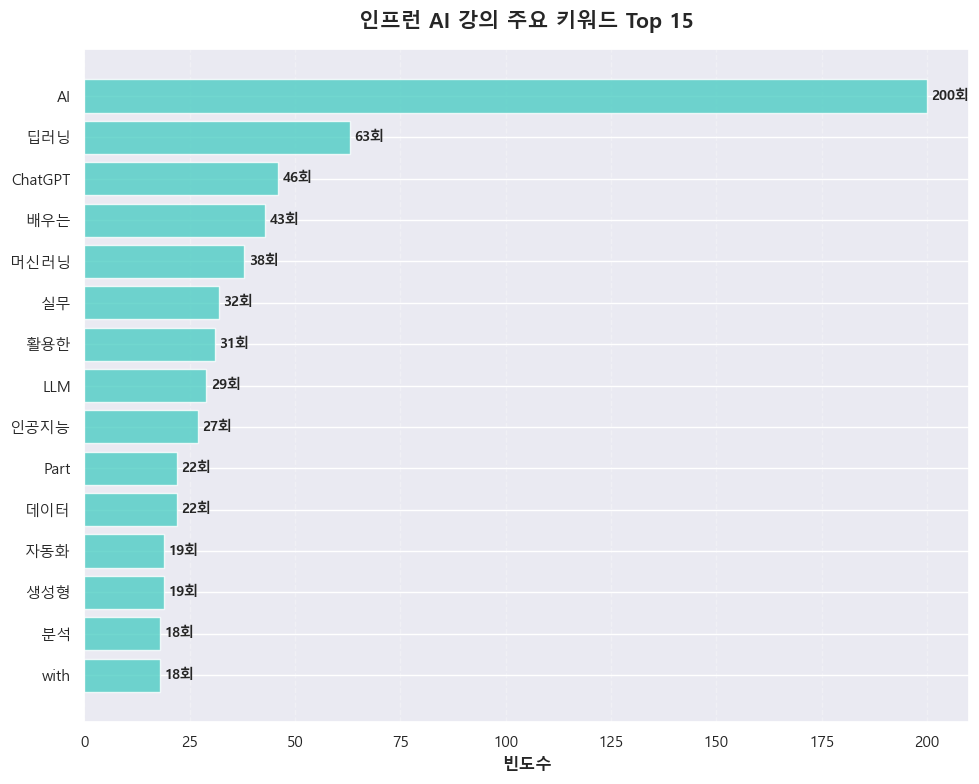

✅ 시각화 4 저장 완료: 분석결과/4_inflearn_keywords.png


In [16]:
#    Top 15 
keywords, frequencies = zip(*top_keywords)

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(keywords)), frequencies, color='#4ECC4', alpha=0.8)

#    
for i, (bar, freq) in enumerate(zip(bars, frequencies)):
    ax.text(freq + 1, i, f'{freq}', 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(range(len(keywords)))
ax.set_yticklabels(keywords, fontsize=11)
ax.set_xlabel('', fontsize=12, fontweight='bold')
ax.set_title(' I    Top 15', 
             fontsize=15, fontweight='bold', pad=15)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('/4_inflearn_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("  4  : /4_inflearn_keywords.png")


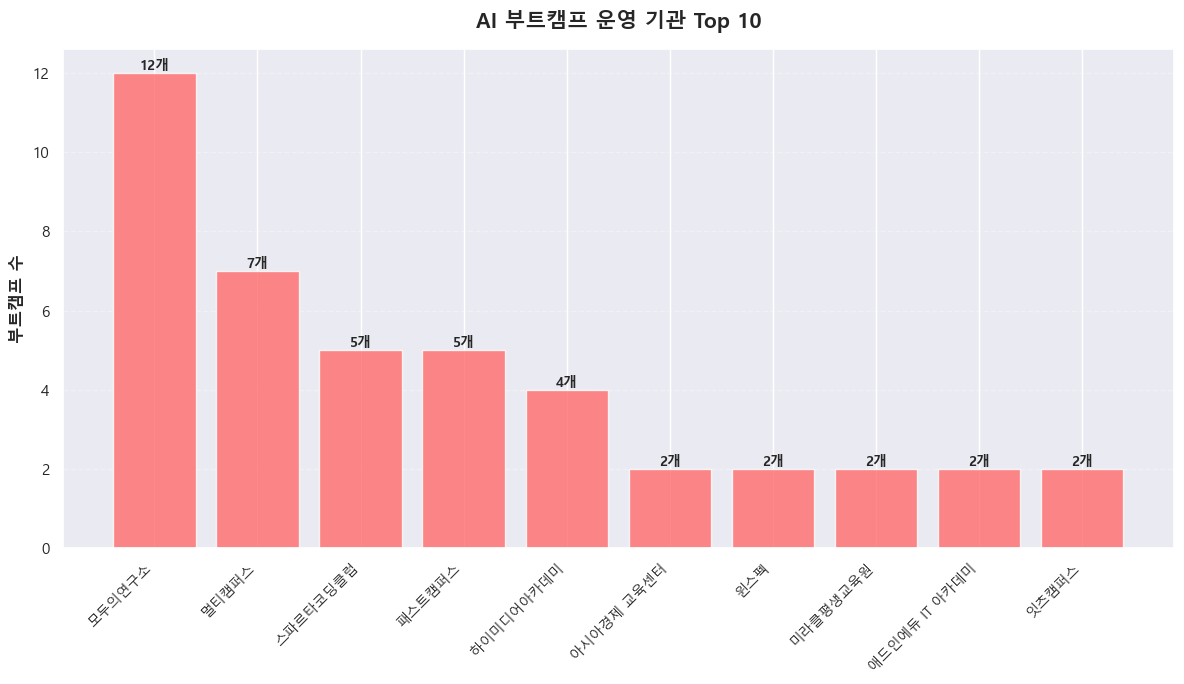

✅ 시각화 5 저장 완료: 분석결과/5_ai_bootcamp_orgs.png


In [17]:
# I    Top 10
ai_org_counts = ai_bootcamp['organization'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(range(len(ai_org_counts)), ai_org_counts.values, 
              color='#FF6B6B', alpha=0.8)

#    
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(range(len(ai_org_counts)))
ax.set_xticklabels(ai_org_counts.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel(' ', fontsize=12, fontweight='bold')
ax.set_title('I    Top 10', 
             fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('/5_ai_bootcamp_orgs.png', dpi=300, bbox_inches='tight')
plt.show()

print("  5  : /5_ai_bootcamp_orgs.png")


In [19]:
#   CSV 
summary_data.to_csv('/_.csv', index=False, encoding='utf-8-sig')

# I   
ai_bootcamp[['organization', 'title', 'category', 'keywords']].to_csv(
    '/I__.csv', index=False, encoding='utf-8-sig'
)

# I   
ai_news[['category', 'title']].to_csv(
    '/I__.csv', index=False, encoding='utf-8-sig'
)

print("=" * 80)
print("   CSV  ")
print("=" * 80)
print("  :")
print("   - /_.csv")
print("   - /I__.csv")
print("   - /I__.csv")
print("=" * 80)


✅ 분석 결과 CSV 저장 완료
📁 저장된 파일:
   - 분석결과/플랫폼별_요약.csv
   - 분석결과/AI_부트캠프_리스트.csv
   - 분석결과/AI_뉴스_리스트.csv


In [20]:
print("\n" + "=" * 80)
print(" WebCrawling   !")
print("=" * 80)
print("\n  :")
print("   1⃣  /1_platform_comparison.png -  I  ")
print("   2⃣  /2_bootcamp_category_pie.png -   ")
print("   3⃣  /3_ai_ratio_comparison.png - I  ")
print("   4⃣  /4_inflearn_keywords.png -   Top 15")
print("   5⃣  /5_ai_bootcamp_orgs.png - I   Top 10")

print("\n  :")
print("    /_.md -   ")
print("    /_.csv")
print("    /I__.csv")
print("    /I__.csv")

print("\n" + "=" * 80)
print("   :")
print("=" * 80)
print("1. PPT    5  ")
print("2.     ' ai' ")
print("3. REME.md   ")
print("4. GitHub  & ")
print("=" * 80)




🎉 WebCrawling 데이터 분석 완료!

📊 생성된 시각화:
   1️⃣  분석결과/1_platform_comparison.png - 플랫폼별 AI 콘텐츠 비교
   2️⃣  분석결과/2_bootcamp_category_pie.png - 부트캠프 카테고리 분포
   3️⃣  분석결과/3_ai_ratio_comparison.png - AI 비율 비교
   4️⃣  분석결과/4_inflearn_keywords.png - 인프런 키워드 Top 15
   5️⃣  분석결과/5_ai_bootcamp_orgs.png - AI 부트캠프 기관 Top 10

📝 생성된 문서:
   📄 분석결과/인사이트_리포트.md - 종합 인사이트 리포트
   📄 분석결과/플랫폼별_요약.csv
   📄 분석결과/AI_부트캠프_리스트.csv
   📄 분석결과/AI_뉴스_리스트.csv

💡 다음 단계 제안:
1. PPT 발표 자료에 시각화 5개 이미지 삽입
2. 인사이트 리포트를 기말 프로젝트 '직무 ai툴'과 연계
3. README.md에 분석 과정 문서화
4. GitHub에 커밋 & 푸시


In [21]:
import os

#    (  )
if not os.path.exists(''):
    os.makedirs('')
    print(" ''   ")
else:
    print(" ''   ")


✅ '분석결과' 폴더 확인 완료


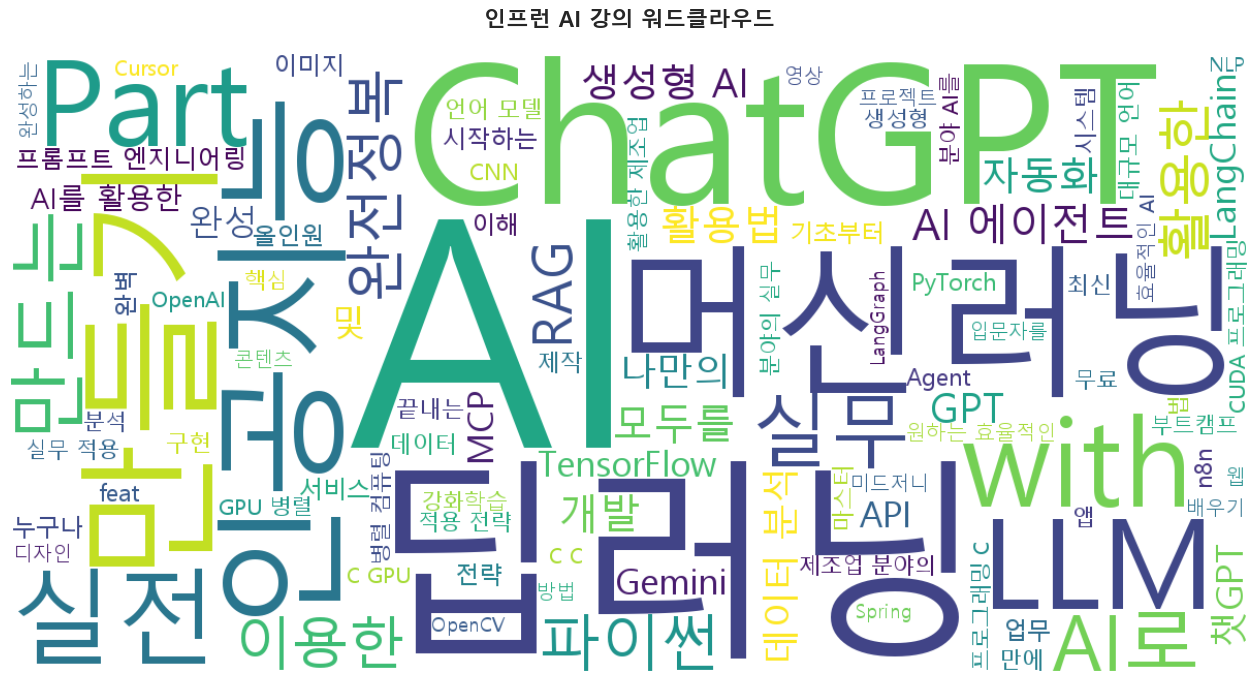

✅ 워드클라우드 생성 완료: 분석결과/6_inflearn_wordcloud.png


In [22]:
# wordcloud        
# !pip install wordcloud

try:
    from wordcloud import WordCloud
    
    #   
    all_titles = ' '.join(inflearn['title'].astype(str))
    
    #  
    stopwords = {'', '', '', '', '', '', '', 
                 '', '', '', '', '', '',
                 '', '', '', '', ''}
    
    #   (Windows   )
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/malgun.ttf',  # Windows  
        width=1200,
        height=600,
        background_color='white',
        stopwords=stopwords,
        colormap='viridis',
        max_words=100
    ).generate(all_titles)
    
    # 
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(' I  ', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('/6_inflearn_wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("   : /6_inflearn_wordcloud.png")
    
except ImportError:
    print("  wordcloud    .")
    print("    : pip install wordcloud")
except Exception as e:
    print(f"      : {e}")


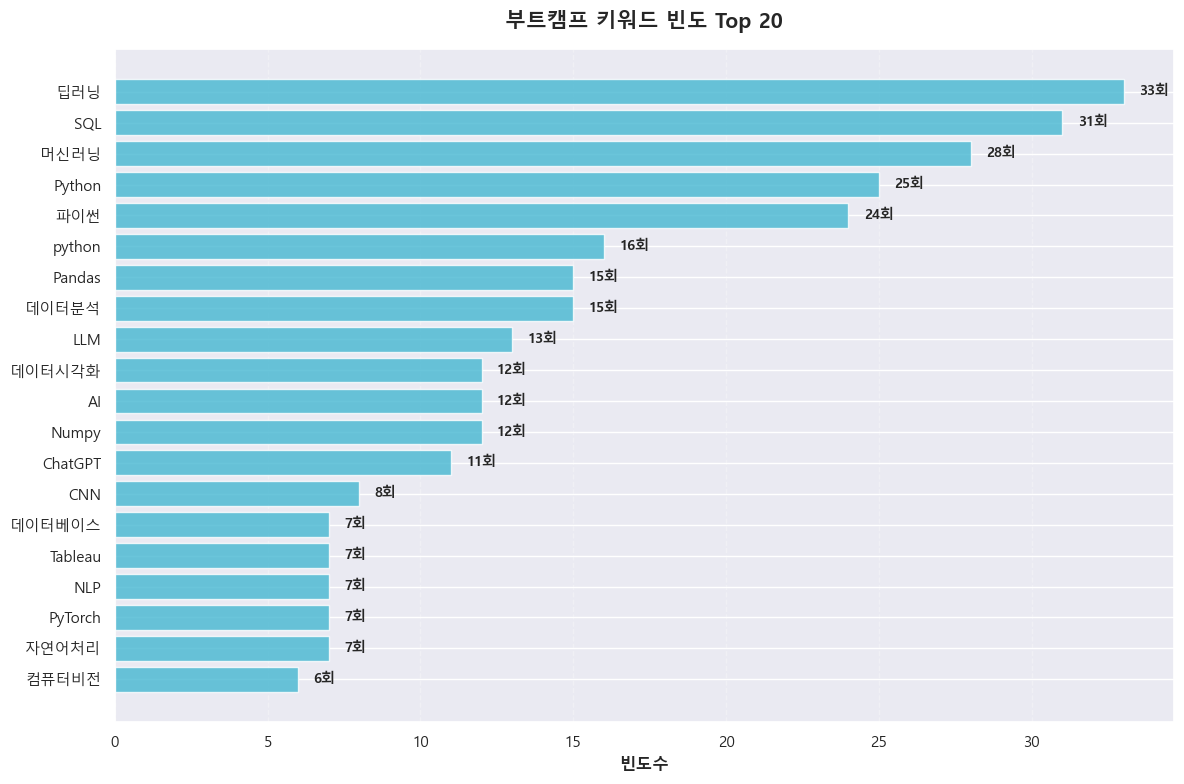

✅ 부트캠프 키워드 분석 완료: 분석결과/7_bootcamp_keywords.png


In [23]:
#    
all_keywords = []
for keywords in bootcamp['keywords'].dropna():
    all_keywords.extend(str(keywords).split(','))

#     
all_keywords = [k.strip() for k in all_keywords if k.strip()]

#  
keyword_freq = Counter(all_keywords).most_common(20)

# 
keywords_list, freq_list = zip(*keyword_freq)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(keywords_list)), freq_list, color='#45B71', alpha=0.8)

#    
for i, (bar, freq) in enumerate(zip(bars, freq_list)):
    ax.text(freq + 0.5, i, f'{freq}', 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(range(len(keywords_list)))
ax.set_yticklabels(keywords_list, fontsize=11)
ax.set_xlabel('', fontsize=12, fontweight='bold')
ax.set_title('   Top 20', 
             fontsize=15, fontweight='bold', pad=15)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('/7_bootcamp_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("    : /7_bootcamp_keywords.png")
